<a href="https://colab.research.google.com/github/sakuyasophie/ChatPaper/blob/main/%E2%80%9CDatasets_analysis_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IEA EBC Annex 81 | SubTask C3: Analysis of datasets inventory for B2G services

This notebook contains the code we used to analyze the collected datasets.




## Datasets Sheet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1oeuAFI0595vohN7Fvo8apNX_4faoa-SyQUJTlcVQ0Bo/edit?usp=sharing')

# Create df for Datasets sheet
sheet_datasets = wb.worksheet('Datasets info')

datasets = pd.DataFrame(sheet_datasets.get_all_values()).dropna()
datasets.columns = datasets.iloc[0] #Name columns with values of first row
datasets.drop(index=datasets.index[0], axis=0, inplace=True) #delete first row that had column names
datasets.drop(datasets[(datasets['Status'] == 'No reply')].index, inplace=True)
datasets.drop(datasets[(datasets['Status'] == 'Dataset publicly unavailable')].index, inplace=True)
datasets.drop(datasets[(datasets['Status'] == 'Dataset out-of-scope')].index, inplace=True)
datasets.drop(datasets[(datasets['Status'] == 'Dataset does not conform to quality requests')].index, inplace=True)
datasets.reset_index(drop=True, inplace=True)

#datasets.head()
#print(datasets)
columns = ['Project / dataset name']
selectedDatasets = datasets[['Project / dataset name', 'Country','Dataset type','Building Sector','Energy Sector','Utility Rate','Temporal resolution of the dataset (sampling rate)','Time duration of the dataset (length)','Data quality (% of missing datapoints)','DSM strategy ','Flexible Resources','Control objectives']]


## Datasets Sheet Analysis: building, energy grid and utility program type




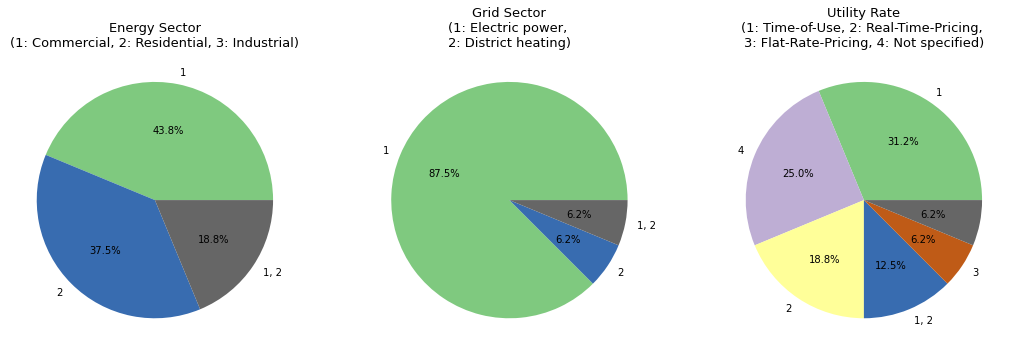

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))

datasets['Building Sector'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Accent', ax=axs[0])
datasets['Energy Sector'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Accent', ax=axs[1])
datasets['Utility Rate'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Accent', ax=axs[2])

axs[0].set_title('Energy Sector\n(1: Commercial, 2: Residential, 3: Industrial)', size=13)
axs[1].set_title('Grid Sector\n(1: Electric power, \n2: District heating)', size=13)
axs[2].set_title('Utility Rate\n(1: Time-of-Use, 2: Real-Time-Pricing, \n3: Flat-Rate-Pricing, 4: Not specified)', size=13)
axs[0].set_ylabel('', size=12)
axs[1].set_ylabel('', size=12)
axs[2].set_ylabel('', size=12)

print()

## Datasets Sheet Analysis: DSM strategy and flexible resources & Control actions and control objectives





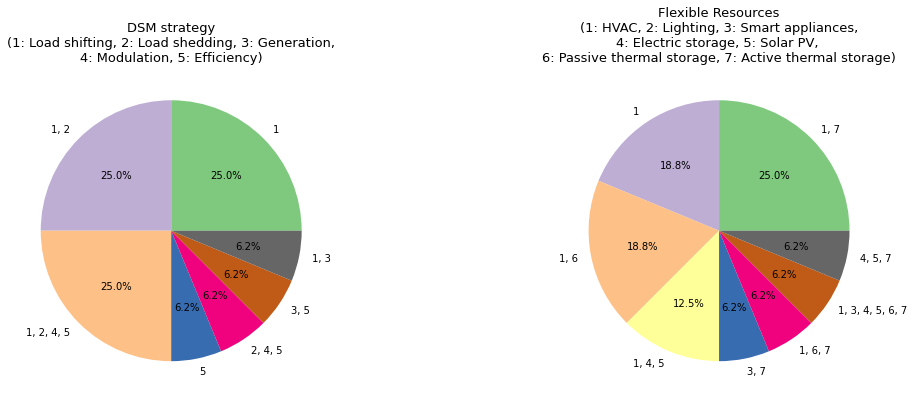

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(18, 6))

datasets['DSM strategy '].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Accent', ax=axs[0])
datasets['Flexible Resources'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Accent', ax=axs[1])

axs[0].set_title('DSM strategy\n(1: Load shifting, 2: Load shedding, 3: Generation,\n4: Modulation, 5: Efficiency)', size=13)
axs[1].set_title('Flexible Resources\n(1: HVAC, 2: Lighting, 3: Smart appliances,\n4: Electric storage, 5: Solar PV, \n6: Passive thermal storage, 7: Active thermal storage)', size=13)
axs[0].set_ylabel('', size=12)
axs[1].set_ylabel('', size=12)
print()

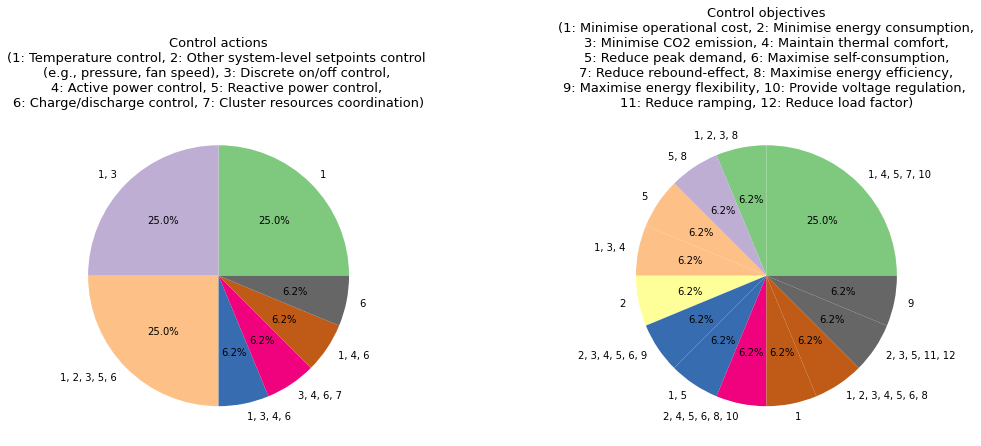

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(18, 6))

datasets['Control actions'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Accent', ax=axs[0])
datasets['Control objectives'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Accent', ax=axs[1])

axs[0].set_title('Control actions\n(1: Temperature control, 2: Other system-level setpoints control \n(e.g., pressure, fan speed), 3: Discrete on/off control, \n4: Active power control, 5: Reactive power control, \n6: Charge/discharge control, 7: Cluster resources coordination)', size=13)
axs[1].set_title('Control objectives\n(1: Minimise operational cost, 2: Minimise energy consumption,\n3: Minimise CO2 emission, 4: Maintain thermal comfort,\n5: Reduce peak demand, 6: Maximise self-consumption,\n7: Reduce rebound-effect, 8: Maximise energy efficiency,\n9: Maximise energy flexibility, 10: Provide voltage regulation, \n11: Reduce ramping, 12: Reduce load factor)', size=13)
axs[0].set_ylabel('', size=12)
axs[1].set_ylabel('', size=12)
print()

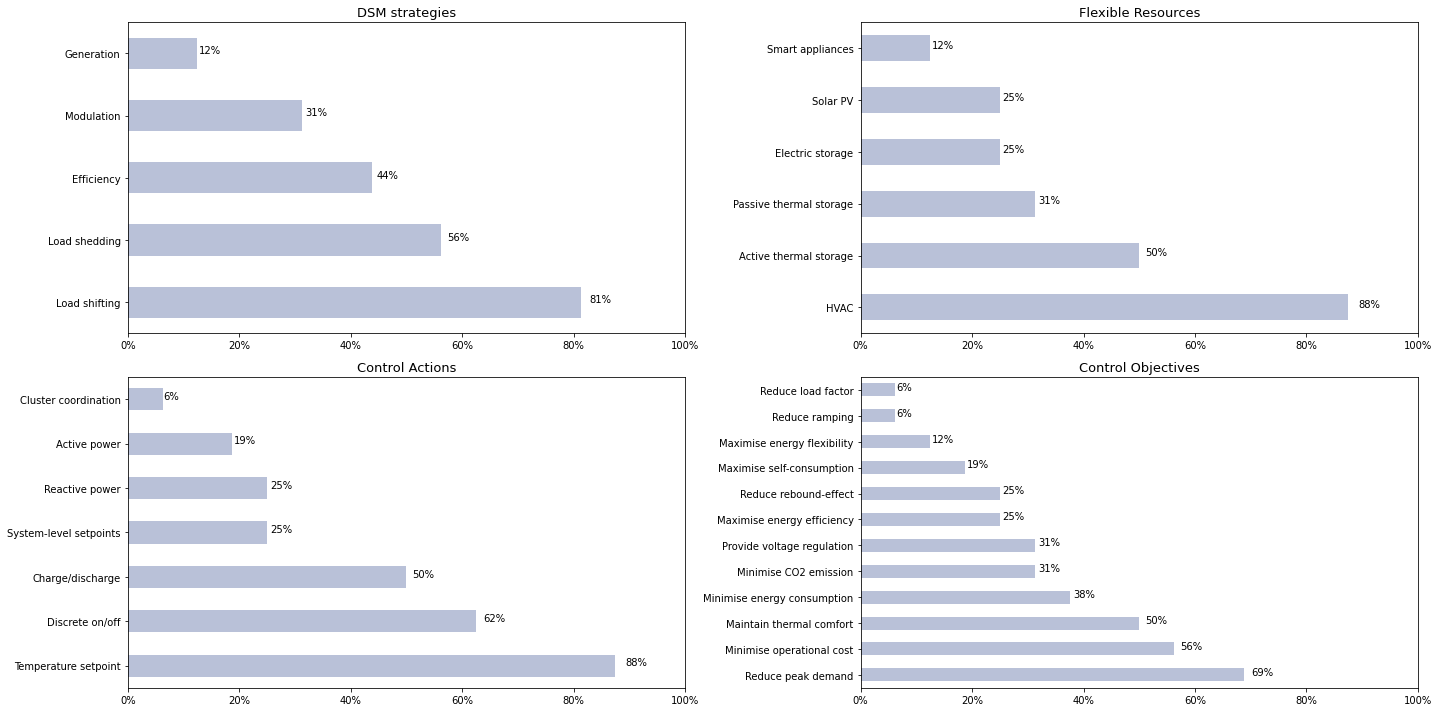

In [ ]:
import matplotlib.ticker as mtick

f, axs = plt.subplots(2, 2, figsize=(20, 10))

my_colors = [0.1, 0.2, 0.5, 0.3]

indDSMStrategy = datasets['DSM strategy '].str.split(', ', expand=True).stack().value_counts().mul(100).round(1)/datasets['DSM strategy '].count()
indFlexibleResources = datasets['Flexible Resources'].str.split(', ', expand=True).stack().value_counts().mul(100).round(1)/datasets['Flexible Resources'].count()

ax1 = indDSMStrategy.plot(kind='barh', color=my_colors, ax=axs[0,0])
ax2 = indFlexibleResources.plot(kind='barh', color=my_colors, ax=axs[0,1])

# Add this loop to add the annotations
for p in ax1.patches:
    #width = p.get_width()
    #height = p.get_height()/100
    width = p.get_width()/100
    height = p.get_height()
    x, y = p.get_xy()
    ax1.annotate(f'{width:.0%}', (x + width*102, y + height/2), ha='left')
    #ax1.annotate(f'{height:.0%}', (x + width/2, y + height*102), ha='center')

#labels = [item.get_text() for item in ax1.get_xticklabels()]
labels = [item.get_text() for item in ax1.get_yticklabels()]
labels = [w.replace('1', 'Load shifting') for w in labels]
labels = [w.replace('2', 'Load shedding') for w in labels]
labels = [w.replace('3', 'Generation') for w in labels]
labels = [w.replace('4', 'Modulation') for w in labels]
labels = [w.replace('5', 'Efficiency') for w in labels]

#ax1.set_xticklabels(labels, rotation=45)
ax1.set_yticklabels(labels, rotation=0)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())


    # Add this loop to add the annotations
for p in ax2.patches:
    #width = p.get_width()
    #height = p.get_height()/100
    width = p.get_width()/100
    height = p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{width:.0%}', (x + width*102, y + height/2), ha='left')
    #ax2.annotate(f'{height:.0%}', (x + width/2, y + height*102), ha='center')

#labels = [item.get_text() for item in ax2.get_xticklabels()]
labels = [item.get_text() for item in ax2.get_yticklabels()]
labels = [w.replace('1', 'HVAC') for w in labels]
labels = [w.replace('2', 'Lighting') for w in labels]
labels = [w.replace('3', 'Smart appliances') for w in labels]
labels = [w.replace('4', 'Electric storage') for w in labels]
labels = [w.replace('5', 'Solar PV') for w in labels]
labels = [w.replace('6', 'Passive thermal storage') for w in labels]
labels = [w.replace('7', 'Active thermal storage') for w in labels]

#ax2.set_xticklabels(labels, rotation=45)
ax2.set_yticklabels(labels, rotation=0)
#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.xaxis.set_major_formatter(mtick.PercentFormatter())
#plt.gcf().autofmt_xdate()


indControlActions = datasets['Control actions'].str.split(', ', expand=True).stack().value_counts().mul(100).round(1)/datasets['Control actions'].count()
indControlObjectives = datasets['Control objectives'].str.split(', ', expand=True).stack().value_counts().mul(100).round(1)/datasets['Control objectives'].count()
my_colors = [0.1, 0.2, 0.5, 0.3]

ax3 = indControlActions.plot(kind='barh', color=my_colors, ax=axs[1,0])
ax4 = indControlObjectives.plot(kind='barh', color=my_colors, ax=axs[1,1])

# Add this loop to add the annotations
for p in ax3.patches:
    width = p.get_width()/100
    height = p.get_height()
    x, y = p.get_xy()
    ax3.annotate(f'{width:.0%}', (x + width*102, y + height/2), ha='left')

labels = [item.get_text() for item in ax3.get_yticklabels()]
labels = [w.replace('1', 'Temperature setpoint') for w in labels]
labels = [w.replace('2', 'System-level setpoints') for w in labels]
labels = [w.replace('3', 'Discrete on/off') for w in labels]
labels = [w.replace('4', 'Active power') for w in labels]
labels = [w.replace('5', 'Reactive power') for w in labels]
labels = [w.replace('6', 'Charge/discharge') for w in labels]
labels = [w.replace('7', 'Cluster coordination') for w in labels]

ax3.set_yticklabels(labels, rotation=0)
ax3.xaxis.set_major_formatter(mtick.PercentFormatter())

# Add this loop to add the annotations
for p in ax4.patches:
    width = p.get_width()/100
    height = p.get_height()
    x, y = p.get_xy()
    ax4.annotate(f'{width:.0%}', (x + width*102, y + height/2), ha='left')

labels = [item.get_text() for item in ax4.get_yticklabels()]
labels = [w.replace('10', 'Provide voltage regulation') for w in labels]
labels = [w.replace('11', 'Reduce ramping') for w in labels]
labels = [w.replace('12', 'Reduce load factor') for w in labels]
labels = [w.replace('1', 'Minimise operational cost') for w in labels]
labels = [w.replace('2', 'Minimise energy consumption') for w in labels]
labels = [w.replace('3', 'Minimise CO2 emission') for w in labels]
labels = [w.replace('4', 'Maintain thermal comfort') for w in labels]
labels = [w.replace('5', 'Reduce peak demand') for w in labels]
labels = [w.replace('6', 'Maximise self-consumption') for w in labels]
labels = [w.replace('7', 'Reduce rebound-effect') for w in labels]
labels = [w.replace('8', 'Maximise energy efficiency') for w in labels]
labels = [w.replace('9', 'Maximise energy flexibility') for w in labels]

ax4.set_yticklabels(labels, rotation=0)
ax4.xaxis.set_major_formatter(mtick.PercentFormatter())
#plt.gcf().autofmt_xdate()

axs[0,0].set_title('DSM strategies', size=13)
axs[0,0].set_ylabel('', size=12)
axs[0,1].set_title('Flexible Resources', size=13)
axs[0,1].set_ylabel('', size=12)

axs[1,0].set_title('Control Actions', size=13)
axs[1,0].set_ylabel('', size=12)
axs[1,1].set_title('Control Objectives', size=13)
axs[1,1].set_ylabel('', size=12)
f.tight_layout()

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 100)

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
print()


## Typical Use Cases Sheet

In [ ]:
# Create df for Typical systems sheet
sheet_systems = wb.worksheet('Typical use cases')

typical_systems = pd.DataFrame(sheet_systems.get_all_values()).dropna()
typical_systems.columns = typical_systems.iloc[0] #Name columns with values of first row
typical_systems.drop(index=typical_systems.index[0], axis=0, inplace=True) #delete first row that had column names
typical_systems.drop(typical_systems[(typical_systems['Status'] == 'No reply')].index, inplace=True)
typical_systems.drop(typical_systems[(typical_systems['Status'] == 'Dataset publicly unavailable')].index, inplace=True)
typical_systems.drop(typical_systems[(typical_systems['Status'] == 'Dataset out-of-scope')].index, inplace=True)
typical_systems.drop(datasets[(datasets['Status'] == 'Dataset does not conform to quality requests')].index, inplace=True)
typical_systems.reset_index(drop=True, inplace=True)



## Typical Systems Sheet Analysis: parallel table

In [ ]:
import plotly.express as px
from plotly.express.colors import sample_colorscale
import numpy as np

df_plot = typical_systems

conditions = [
    (df_plot['DSM Strategy'] == 'Load shifting'),
    (df_plot['DSM Strategy'] == 'Load shedding'),
    (df_plot['DSM Strategy'] == 'Generation'),
    (df_plot['DSM Strategy'] == 'Modulation'),
    (df_plot['DSM Strategy'] == 'Efficiency'),
    (df_plot['DSM Strategy'] == 'Other'),
]

x = np.linspace(0, 1, 6)
c = sample_colorscale('dense', list(x))
#color_continuous_scale=px.colors.sequential.Rainbow
df_plot['color'] = np.select(conditions, c, default='lightgrey')

fig = px.parallel_categories(
    df_plot,
    dimensions=['DSM Strategy','Building Sector','Grid Sector' , 'Flexible Resources','Control Actions'],

    color="color",

)


fig.update_layout(
    margin=dict(l=55, r=160, t=20, b=20),
    font=dict(
        size=14,
    )
)


fig.show()


## Heatmap contrasting the datasets' available variables with the ones needed to calculate each group of KPIs.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#%% Load dataset
KPI_dataset = drive.CreateFile({'id': '12F-HCUt_DdXgaP9W1G_FjlrdCRJ2UzI2'})
KPI_dataset.GetContentFile('datasetForPython_V7.csv')
KPI_dataset = pd.read_csv('datasetForPython_V7.csv')


In [ ]:
# create dataframe using the pivot
KPI_dataset2 = KPI_dataset.pivot("Energy Flexibility KPIs","Datasets","Values")
# change rows orders to make sure its is identical to the google sheet/table (cleaned version)
KPI_dataset3 = KPI_dataset2.reindex(['Peak Power Shedding',
                                     'Energy / Average Power Load Shedding',
                                     'Peak Power / Energy Rebound',
                                     'Valley Filling',
                                     'Load Shifting',
                                     'Demand Profile Reshaping',
                                     'Energy Storage Capability',
                                     'Demand Response Energy Efficiency',
                                     'Demand Response Costs / Savings',
                                     'Demand Response Emission / Environmental Impact',
                                     'Grid Interaction',
                                     'Impact on Indoor Environment Quality'])

In [ ]:
#%% Load dataset
total_KPI_dataset = drive.CreateFile({'id': '12DteKBaB2b1YKqIZtRtCF8p9AZKMLh5f'})
total_KPI_dataset.GetContentFile('dataset_Total_v2.csv')
total_KPI_dataset = pd.read_csv('dataset_Total_v2.csv')

total_KPI_dataset = total_KPI_dataset.pivot("Energy Flexibility KPIs","Datasets","Total Values")

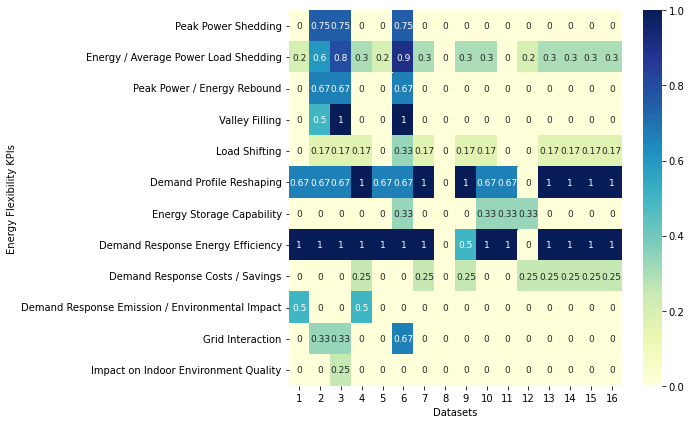

In [ ]:
#%% Plotting
plt.figure(figsize=(10,6))
KPI_heatmap = sns.heatmap(KPI_dataset3,
                          annot=True,
                          vmin=0,
                          vmax=1,
                          cmap="YlGnBu",
                          annot_kws={"size": 9},
                          )

plt.tight_layout()
plt.savefig('EF Heatmap',dpi=300)

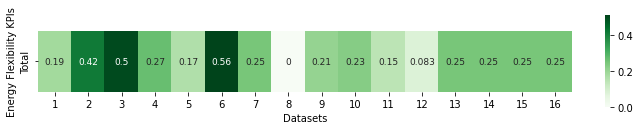

In [ ]:
#%% Plotting the total KPIs for all the dataset
plt.figure(figsize=(10,2))
Totao_KPI_heatmap = sns.heatmap(total_KPI_dataset,
                          annot=True,
                          vmin=0,
                          vmax=0.51,
                          cmap="Greens",
                          annot_kws={"size": 9},
                          cbar_kws={"shrink": 1.5})

plt.tight_layout()
plt.savefig('EF Heatmap Total',dpi=300)